In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import xarray as xr
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
# import itertools

In [6]:
likelihood = np.load('../data/analysis/likelihood.npy', allow_pickle=True).item()
posterior = np.load('../data/analysis/posterior.npy', allow_pickle=True).item()
params = np.load('../data/analysis/params.npy', allow_pickle=True).item()

In [7]:
with open('../river_sources.pkl', 'rb') as file:
    river_sources = pickle.load(file)

In [78]:
river_sources

{'Luanda': (-9.3, 13.0),
 'Cuvo': (-10.87917, 13.7),
 'Paraíba do Sul': (-21.6208, -40.9),
 'Itajaí-Açu': (-26.9125, -48.5),
 'Chiloango-Congo': (-5.6442, 12.05),
 'Cape-Town': (-33.93, 18.2),
 'Rio-de-la-Plata': (-34.3, -58.2),
 'Rio-de-Janeiro': (-23.1, -43.32083),
 'Porto-Alegre': (-32.15, -51.9),
 'Santos': (-24.05, -46.2958)}

In [8]:
#time_range = pd.date_range('2018-01-01 12:00:00', '2019-10-23 12:00', periods=1321)

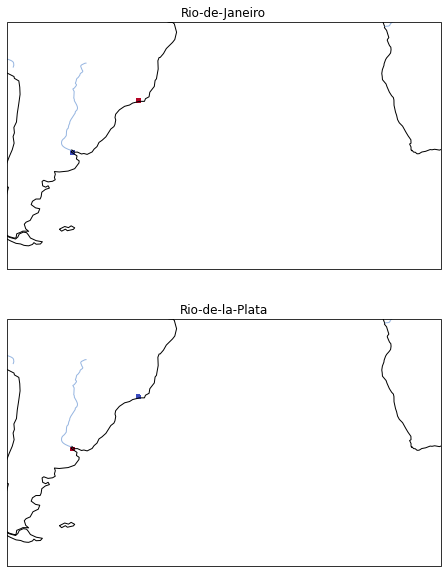

In [18]:
y,x = np.meshgrid(params['lat_range'], params['lon_range'])
t=1

fig,ax = plt.subplots(ncols=1,nrows=2,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})

ax = ax.reshape(2)

for k, loc in enumerate(list(posterior.keys())):
    
    z = posterior[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    #ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='coolwarm')
#     ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
#                s=50, marker='o', color='yellow', edgecolors='k', zorder=3)
    
# ax[-2].axis('off')
# ax[-1].axis('off')
# bar_ax = fig.add_axes([0.4, 0.17, 0.5, 0.02])
# fig.colorbar(im, cax=bar_ax, orientation='horizontal')
# fig.text(0.4,0.25,'Counts', fontsize=14)
# fig.text(0.4,0.225,f'Days since release: {t/2:0.0f}')
# fig.text(0.4,0.2,f'Current date: {time_range[t]}')
# #plt.tight_layout()

# Bayes theorem

\begin{equation}
    p(R_i|S_{loc}) = \frac{p(S_{loc}|R_i)p(R_i)}{P(S_{loc})}
\end{equation}

# Priors
Following Ariana's Thesis, we know that $p(R_i)$ comes from the estimated release of plastics released to the Atlantic by each river (Lebreton 2012). 


In [81]:
priors = pd.read_csv('../data/river_inputs.csv', index_col=0)

In [82]:
priors

,i_high,i_mid,i_low,Mean
Rio-de-la-Plata,0.489218,0.532289,0.569515,0.530341
Rio-de-Janeiro,0.173643,0.165557,0.157122,0.165441
Paraíba do Sul,0.106730,0.109024,0.110097,0.108617
Porto-Alegre,0.041184,0.036042,0.031510,0.036245
Chiloango-Congo,0.036067,0.032388,0.029026,0.032493
Santos,0.030768,0.026443,0.022768,0.026660
Luanda,0.020475,0.017871,0.015619,0.017988
Cuvo,0.018264,0.015990,0.013983,0.016079
Itajaí-Açu,0.016162,0.013057,0.010634,0.013284
Cape-Town,0.010060,0.008201,0.006720,0.008327


In [8]:
priors['i_high']['Luanda']

0.0204746533621362

In [9]:
for loc in labels:
    print(loc, priors['Mean'][loc])

Luanda 0.01798828861153176
Cuvo 0.016078948218118533
Paraíba do Sul 0.10861700443862314
Itajaí-Açu 0.013284455848904394
Chiloango-Congo 0.032493461633735406
Cape-Town 0.008326989083182286
Rio-de-la-Plata 0.5303407615398025
Rio-de-Janeiro 0.1654405573347816
Porto-Alegre 0.036245238936315816
Santos 0.026659740897815185


# Likelihood
$p(S_{loc}|R_i)$ is the probability of picking a particle form a specific river in an specific bin.

In [10]:
time = prob['Luanda'].shape[0]

likelihood ={}
particles_per_bin = np.zeros_like(prob['Luanda'])


for t in range(time):
    for loc in labels:
        particles_per_bin[t] += prob[loc][t]
    
for k, loc in enumerate(labels):
    aux = np.zeros_like(prob['Luanda'])
    
    for t in range(time):
        aux[t] = prob[loc][t]/particles_per_bin[t]
        
    likelihood[loc] = aux
    

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Text(0.4, 0.2, 'Current date: 2019-10-23 12:00:00')

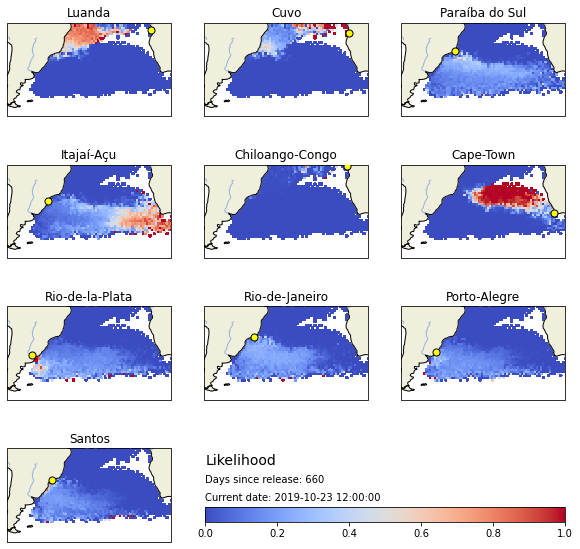

In [11]:
y,x = np.meshgrid(prob['dimensions']['lat'], prob['dimensions']['lon'])
t=1320
labels=list(prob.keys())
labels.pop(-1)

fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})

ax = ax.reshape(12)

for k, loc in enumerate(labels):
    
    z = likelihood[loc][t] #np.ma.masked_array(prob[loc][t], mask=prob['dimensions']['mask'])
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x,y,z,cmap='coolwarm', vmax=1)
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='yellow', edgecolors='k', zorder=3)
    
ax[-2].axis('off')
ax[-1].axis('off')
bar_ax = fig.add_axes([0.4, 0.17, 0.5, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal')
fig.text(0.4,0.25,'Likelihood', fontsize=14)
fig.text(0.4,0.225,f'Days since release: {t/2:0.0f}')
fig.text(0.4,0.2,f'Current date: {time_range[t]}')


# Normalizing constant
$P(S_{loc}$ is the sum of all the hypothesis, i.e. $\sum p(S_{loc}|R_i)p(R_i)$

In [12]:
dims = likelihood['Luanda'][t].shape
normalizing_constant = np.zeros((time,*dims))

for t in range(time):
    total = np.zeros((10,*dims))
    
    for j,loc in enumerate(labels):
        total[j] = likelihood[loc][t]*priors['Mean'][loc]
        
    normalizing_constant[t] = np.sum(total, axis=0)


# Posterior/Bayesian probability

\begin{equation}
    p(R_i|S_{loc}) = \frac{p(S_{loc}|R_i)p(R_i)}{P(S_{loc})}
\end{equation}

In [13]:
posterior = {}
for k, loc in enumerate(labels):
    aux = np.zeros_like(prob['Luanda'])
    
    for t in range(time):
        aux[t] = likelihood[loc][t]*priors['Mean'][loc]/normalizing_constant[t]
        
    posterior[loc] = aux

Text(0.4, 0.2, 'Current date: 2019-10-23 12:00:00')

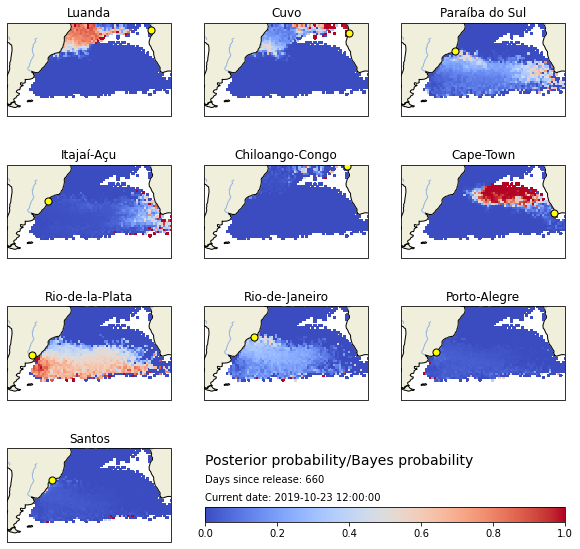

In [14]:
y,x = np.meshgrid(prob['dimensions']['lat'], prob['dimensions']['lon'])

fig,ax = plt.subplots(ncols=3,nrows=4,figsize=(10,10),
                      subplot_kw={'projection': ccrs.PlateCarree()})

ax = ax.reshape(12)
t =1320
for k, loc in enumerate(labels):
    
    z = posterior[loc][t]
    
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    #ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    
    im = ax[k].pcolormesh(x,y,z,cmap='coolwarm', vmax=1)
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='yellow', edgecolors='k', zorder=3)

ax[-2].axis('off')
ax[-1].axis('off')
bar_ax = fig.add_axes([0.4, 0.17, 0.5, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal')

fig.text(0.4,0.25,'Posterior probability/Bayes probability', fontsize=14)
fig.text(0.4,0.225,f'Days since release: {t/2:0.0f}')
fig.text(0.4,0.2,f'Current date: {time_range[t]}')
#fig.tight_layout()

# Test

In [66]:
test = np.zeros((time,*dims))

for t in range(time):
    for loc in labels:
    
        test[t] += posterior[loc][t]

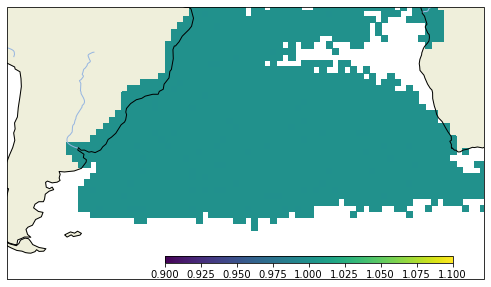

In [69]:
y,x = np.meshgrid(prob['dimensions']['lat'], prob['dimensions']['lon'])

fig,ax = plt.subplots(figsize=(10,5),
                      subplot_kw={'projection': ccrs.PlateCarree()})


t =1300
    
z = test[t]
ax.set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
    
im = ax.pcolormesh(x,y,z,cmap='viridis', vmax=1)
#plt.colorbar()
bar_ax = fig.add_axes([0.4, 0.17, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal')
#plt.tight_layout()

# Likelihood vs. Bayesian

In [44]:
from ipywidgets import interactive
%matplotlib inline

In [ ]:
river_sources

In [48]:
priors['Mean'][loc]

0.5303407615398025

Text(0.85, 0.2, 'Prior: 53.0%')

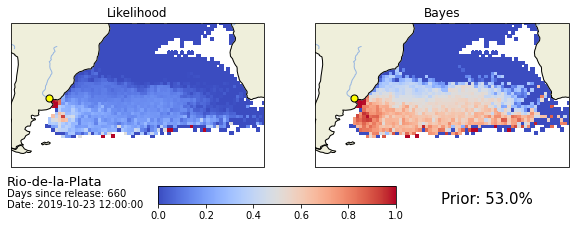

In [61]:
y,x = np.meshgrid(prob['dimensions']['lat'], prob['dimensions']['lon'])

fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5),
                      subplot_kw={'projection': ccrs.PlateCarree()})

t =1320
loc = 'Rio-de-la-Plata'

for k in range(2):
    ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
    ax[k].add_feature(cfeature.LAND, zorder=1)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
           s=50, marker='o', color='yellow', edgecolors='k', zorder=3)

ax[0].pcolormesh(x,y,likelihood[loc][t],cmap='coolwarm', vmax=1)
ax[0].set_title("Likelihood")
im =ax[1].pcolormesh(x,y,posterior[loc][t],cmap='coolwarm', vmax=1)
ax[1].set_title("Bayes")


bar_ax = fig.add_axes([0.33, 0.2, 0.33, 0.05])
fig.colorbar(im, cax=bar_ax, orientation='horizontal')

fig.text(0.12,0.25, loc, fontsize=13)
fig.text(0.12,0.22,f'Days since release: {t/2:0.0f}')
fig.text(0.12,0.19,f'Date: {time_range[t]}')

fig.text(0.85,0.2, f"Prior: {priors['Mean'][loc]*100:0.1f}%", fontsize=15, ha='right')

In [62]:
def f(t, loc):
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5),
                          subplot_kw={'projection': ccrs.PlateCarree()})

    for k in range(2):
        ax[k].set_extent([-73.0, 24.916666,-60.916664, -5.0833335], crs=ccrs.PlateCarree())
        ax[k].add_feature(cfeature.LAND, zorder=1)
        ax[k].add_feature(cfeature.COASTLINE)
        ax[k].add_feature(cfeature.RIVERS)
        ax[k].scatter(river_sources[loc][1], river_sources[loc][0], 
               s=50, marker='o', color='yellow', edgecolors='k', zorder=3)

    ax[0].pcolormesh(x,y,likelihood[loc][t],cmap='coolwarm', vmax=1)
    ax[0].set_title("Likelihood")
    im =ax[1].pcolormesh(x,y,posterior[loc][t],cmap='coolwarm', vmax=1)
    ax[1].set_title("Bayes")


    bar_ax = fig.add_axes([0.33, 0.2, 0.33, 0.05])
    fig.colorbar(im, cax=bar_ax, orientation='horizontal')

    fig.text(0.12,0.25, loc, fontsize=13)
    fig.text(0.12,0.22,f'Days since release: {t/2:0.0f}')
    fig.text(0.12,0.19,f'Date: {time_range[t]}')
    fig.text(0.85,0.2, f"Prior: {priors['Mean'][loc]*100:0.1f}%", 
             fontsize=15, ha='right')
interactive(f, t=(0,1320), loc=labels)

interactive(children=(IntSlider(value=660, description='t', max=1320), Dropdown(description='loc', options=('L…